In [63]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA, FastICA
# import psyplot.project as psy
from sklearn.svm import SVR

In [64]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/ORBITAL_BT/20-56-02_2"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"

In [65]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,1.497522,-17.298222,-7.023603,-11.205885,14.206353,-8.073137,12.077803,1.188005,-21.182160,12.422483,...,-0.782009,-13.568072,11.335606,27.711756,1.055951,16.339926,-6.282044,17.143698,-42.953117,-9.542476
sub-1000458,-3.609246,11.989327,3.261152,-24.368643,17.229946,-15.242127,18.376665,5.099380,-12.348334,1.510425,...,-5.986905,5.410737,-0.495618,18.814777,-1.137268,-2.769095,-3.145500,-1.589806,-26.272230,19.650710
sub-1000575,9.973359,-0.526970,-16.491266,-6.800225,13.853608,-1.892061,12.505042,25.941790,20.332819,6.928286,...,-10.767097,8.413599,1.047728,5.613638,4.589878,5.264478,-3.590338,-26.656113,3.834120,-3.502216
sub-1000606,38.929436,5.370797,8.908671,10.817114,-36.351353,5.951402,-3.859577,19.411158,-6.009777,8.619954,...,-10.831139,4.726006,-3.820110,15.025682,16.366623,-1.969968,30.462904,10.683294,9.435775,28.027756
sub-1000963,36.624977,6.796172,28.739016,-24.772793,-1.008246,-18.348162,12.348809,0.414275,-4.930811,8.232450,...,-3.167979,20.949572,14.828034,14.677424,1.205625,10.694344,7.305981,6.147270,-15.829991,2.581371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,13.933055,-2.528124,13.587676,13.413878,-1.649166,6.557288,6.679683,4.042784,-5.927331,-2.414733,...,-3.064186,6.123437,1.346105,23.049840,17.548922,6.431029,4.111210,-13.984839,8.037389,-27.171171
sub-6023808,2.091982,-9.837544,-9.529078,1.424691,3.072437,2.858213,11.038856,-8.540625,1.723715,-6.049696,...,-19.180178,3.726936,2.863255,20.683193,26.914165,-17.799795,-2.707847,-6.360041,-4.336803,-9.629988
sub-6023847,21.655308,1.412237,-10.311806,4.494585,1.016458,5.328015,14.061031,6.532976,-20.227161,11.678906,...,-0.438347,3.516693,2.250516,42.720130,-2.343096,4.778626,8.819581,-1.611091,-7.671606,2.956114


# UKBioBank

In [66]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [67]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,1.497522,-17.298222,-7.023603,-11.205885,14.206353,-8.073137,12.077803,1.188005,-21.182160,12.422483,...,-0.782009,-13.568072,11.335606,27.711756,1.055951,16.339926,-6.282044,17.143698,-42.953117,-9.542476
sub-1000458,-3.609246,11.989327,3.261152,-24.368643,17.229946,-15.242127,18.376665,5.099380,-12.348334,1.510425,...,-5.986905,5.410737,-0.495618,18.814777,-1.137268,-2.769095,-3.145500,-1.589806,-26.272230,19.650710
sub-1000575,9.973359,-0.526970,-16.491266,-6.800225,13.853608,-1.892061,12.505042,25.941790,20.332819,6.928286,...,-10.767097,8.413599,1.047728,5.613638,4.589878,5.264478,-3.590338,-26.656113,3.834120,-3.502216
sub-1000606,38.929436,5.370797,8.908671,10.817114,-36.351353,5.951402,-3.859577,19.411158,-6.009777,8.619954,...,-10.831139,4.726006,-3.820110,15.025682,16.366623,-1.969968,30.462904,10.683294,9.435775,28.027756
sub-1000963,36.624977,6.796172,28.739016,-24.772793,-1.008246,-18.348162,12.348809,0.414275,-4.930811,8.232450,...,-3.167979,20.949572,14.828034,14.677424,1.205625,10.694344,7.305981,6.147270,-15.829991,2.581371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,13.933055,-2.528124,13.587676,13.413878,-1.649166,6.557288,6.679683,4.042784,-5.927331,-2.414733,...,-3.064186,6.123437,1.346105,23.049840,17.548922,6.431029,4.111210,-13.984839,8.037389,-27.171171
sub-6023808,2.091982,-9.837544,-9.529078,1.424691,3.072437,2.858213,11.038856,-8.540625,1.723715,-6.049696,...,-19.180178,3.726936,2.863255,20.683193,26.914165,-17.799795,-2.707847,-6.360041,-4.336803,-9.629988
sub-6023847,21.655308,1.412237,-10.311806,4.494585,1.016458,5.328015,14.061031,6.532976,-20.227161,11.678906,...,-0.438347,3.516693,2.250516,42.720130,-2.343096,4.778626,8.819581,-1.611091,-7.671606,2.956114


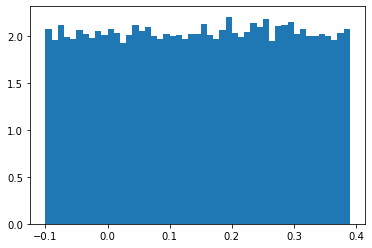

In [68]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

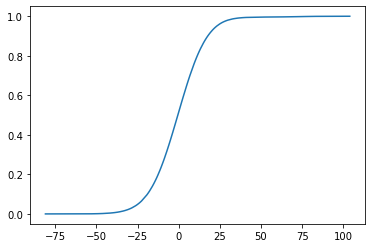

In [69]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [70]:
X2[int(N*0.59)]

2.6659281

In [71]:
len(ukb_emb)

21051

In [72]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [73]:
ukb_positive

dim63     1.000000
dim75     0.984466
dim58     0.949836
dim250    0.906370
dim243    0.859627
            ...   
dim13     0.063085
dim153    0.060567
dim56     0.033918
dim102    0.016056
dim166    0.013254
Length: 256, dtype: float64

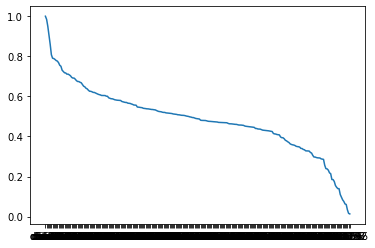

In [74]:
plt.plot(ukb_positive)

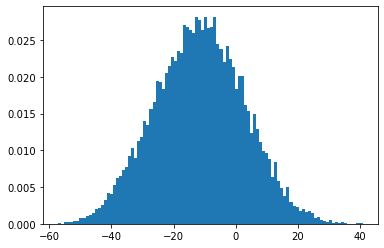

In [75]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

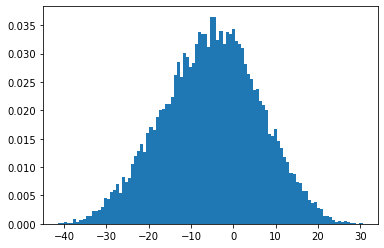

In [76]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [77]:
def compute_umap(df, n_neighbors=15, n_components=2):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [78]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [79]:
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,1.497522,-17.298222,-7.023603,-11.205885,14.206353,-8.073137,12.077803,1.188005,-21.182160,12.422483,...,-0.782009,-13.568072,11.335606,27.711756,1.055951,16.339926,-6.282044,17.143698,-42.953117,-9.542476
sub-1000458,-3.609246,11.989327,3.261152,-24.368643,17.229946,-15.242127,18.376665,5.099380,-12.348334,1.510425,...,-5.986905,5.410737,-0.495618,18.814777,-1.137268,-2.769095,-3.145500,-1.589806,-26.272230,19.650710
sub-1000575,9.973359,-0.526970,-16.491266,-6.800225,13.853608,-1.892061,12.505042,25.941790,20.332819,6.928286,...,-10.767097,8.413599,1.047728,5.613638,4.589878,5.264478,-3.590338,-26.656113,3.834120,-3.502216
sub-1000606,38.929436,5.370797,8.908671,10.817114,-36.351353,5.951402,-3.859577,19.411158,-6.009777,8.619954,...,-10.831139,4.726006,-3.820110,15.025682,16.366623,-1.969968,30.462904,10.683294,9.435775,28.027756
sub-1000963,36.624977,6.796172,28.739016,-24.772793,-1.008246,-18.348162,12.348809,0.414275,-4.930811,8.232450,...,-3.167979,20.949572,14.828034,14.677424,1.205625,10.694344,7.305981,6.147270,-15.829991,2.581371


In [80]:
reduced_ukb_emb, reducer_red = compute_umap(ukb_emb, n_neighbors=15, n_components=20)

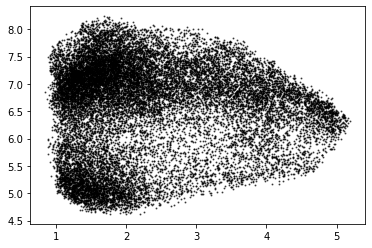

In [81]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [82]:
reduced_ukb_emb.shape

(21051, 20)

In [83]:
umap_ukb = visual_ukb_emb

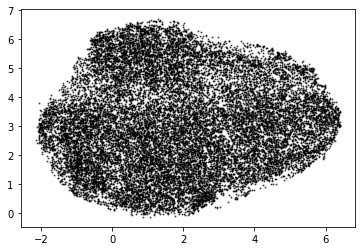

In [84]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

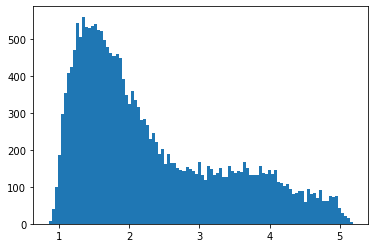

In [85]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

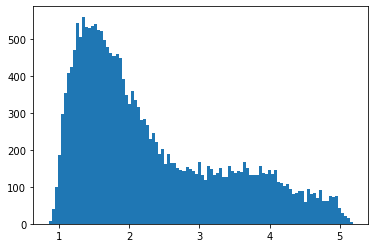

In [86]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

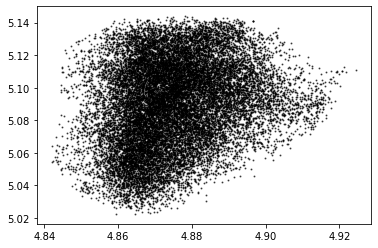

In [87]:
plt.scatter(reduced_ukb_emb[:,14], reduced_ukb_emb[:,15], c='black', s=1, alpha=0.6)

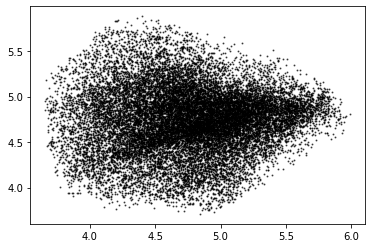

In [88]:
plt.scatter(reduced_ukb_emb[:,4], reduced_ukb_emb[:,5], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [89]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=5000)

In [90]:
global_id.dimension_

8.875537625513637

In [91]:
umap_id = skdim.id.MOM().fit(reduced_ukb_emb, n_neighbors=1000)
umap_id.dimension_

4.501810856466974

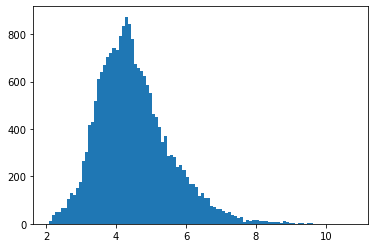

In [92]:
h = plt.hist(umap_id.dimension_pw_, bins=100)

In [93]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [94]:
# lid_mom.dimension_

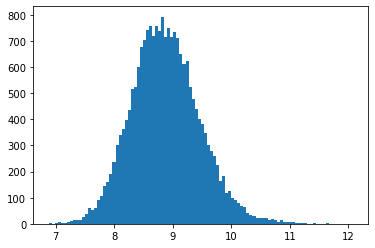

In [95]:

h = plt.hist(global_id.dimension_pw_, bins=100)

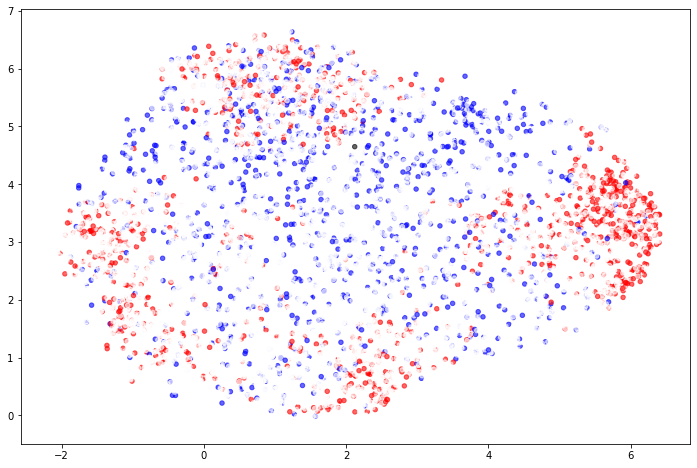

In [96]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

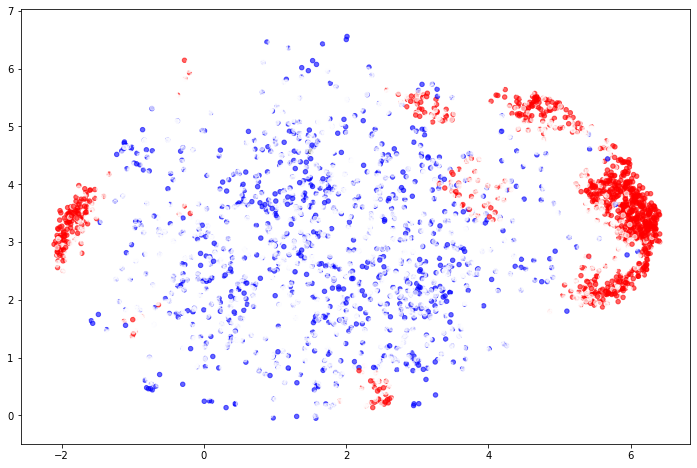

In [97]:
plt.figure(figsize=(12,8))
q_min = np.min(umap_id.dimension_pw_)
q_05 = np.quantile(umap_id.dimension_pw_, 0.05) 
q_95 = np.quantile(umap_id.dimension_pw_, 0.95)
q_max = np.max(umap_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=umap_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [98]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(ukb_emb)
distances, indices = nbrs.kneighbors(ukb_emb)

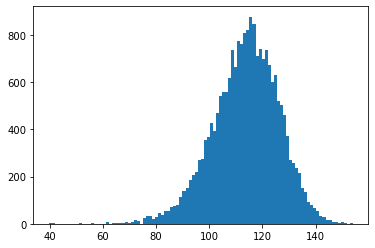

In [99]:
h = plt.hist(distances[:,1], bins=100)

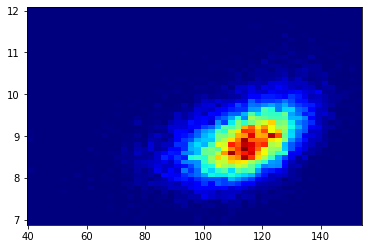

In [100]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

# UMAP of only lower dimensions

In [101]:
ukb_red = ukb_emb.copy(deep=True)
ukb_red.insert(0, "id", global_id.dimension_pw_)

In [102]:
ukb_red.insert(1, "umap_0", umap_ukb[:,0])
ukb_red.insert(2, "umap_1", umap_ukb[:,1])
ukb_red.insert(3, "distance", distances[:,1])
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,8.619630,2.967085,2.304847,119.480428,1.497522,-17.298222,-7.023603,-11.205885,14.206353,-8.073137,...,-0.782009,-13.568072,11.335606,27.711756,1.055951,16.339926,-6.282044,17.143698,-42.953117,-9.542476
sub-1000458,9.197455,0.235869,2.697034,116.929378,-3.609246,11.989327,3.261152,-24.368643,17.229946,-15.242127,...,-5.986905,5.410737,-0.495618,18.814777,-1.137268,-2.769095,-3.145500,-1.589806,-26.272230,19.650710
sub-1000575,8.749346,-0.199037,0.524549,107.950984,9.973359,-0.526970,-16.491266,-6.800225,13.853608,-1.892061,...,-10.767097,8.413599,1.047728,5.613638,4.589878,5.264478,-3.590338,-26.656113,3.834120,-3.502216
sub-1000606,8.546658,5.889087,2.709958,109.638304,38.929436,5.370797,8.908671,10.817114,-36.351353,5.951402,...,-10.831139,4.726006,-3.820110,15.025682,16.366623,-1.969968,30.462904,10.683294,9.435775,28.027756
sub-1000963,9.228908,1.896470,4.595338,120.240481,36.624977,6.796172,28.739016,-24.772793,-1.008246,-18.348162,...,-3.167979,20.949572,14.828034,14.677424,1.205625,10.694344,7.305981,6.147270,-15.829991,2.581371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,8.038235,4.597027,2.477128,111.606296,13.933055,-2.528124,13.587676,13.413878,-1.649166,6.557288,...,-3.064186,6.123437,1.346105,23.049840,17.548922,6.431029,4.111210,-13.984839,8.037389,-27.171171
sub-6023808,9.029550,4.397926,1.842648,127.238142,2.091982,-9.837544,-9.529078,1.424691,3.072437,2.858213,...,-19.180178,3.726936,2.863255,20.683193,26.914165,-17.799795,-2.707847,-6.360041,-4.336803,-9.629988
sub-6023847,9.626092,1.041863,1.101152,106.114393,21.655308,1.412237,-10.311806,4.494585,1.016458,5.328015,...,-0.438347,3.516693,2.250516,42.720130,-2.343096,4.778626,8.819581,-1.611091,-7.671606,2.956114


In [103]:
ukb_red = ukb_red[ukb_red.id < np.quantile(global_id.dimension_pw_, 0.05) ]
# ukb_red = ukb_red[ukb_red.umap_0 > 6]

In [104]:
ukb_red.head()

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1001428,7.944906,5.732121,2.168876,90.177824,13.958853,6.722831,2.681826,22.191032,-14.414640,6.782674,...,1.918153,-0.682570,-16.391940,22.873203,7.485595,9.147932,15.834381,-18.987041,1.544644,18.500130
sub-1002584,7.931327,4.781820,2.476209,87.116523,3.955615,-10.637339,-10.769439,23.307901,1.056509,17.353708,...,-8.042904,-3.884377,-16.391745,26.140324,22.623495,-9.563020,7.716669,-11.420115,-8.246140,-3.183921
sub-1006097,7.711633,-1.428429,1.797008,89.005220,-9.413847,11.568603,-11.930636,10.195893,1.765314,-13.150645,...,9.334038,-23.789180,-3.751849,12.157798,10.245606,11.783370,-1.914953,-8.530606,5.769588,-5.162775
sub-1007175,7.760070,-0.634674,1.792432,104.091510,0.935592,26.521011,26.941525,-33.340640,24.360199,-30.656700,...,3.268295,9.632117,6.543727,-1.203587,-9.322285,11.173265,-0.461867,-14.681664,-8.153533,2.494002
sub-1012329,7.809599,1.941222,0.247470,105.363021,-7.963512,-7.696100,-0.735596,-26.755700,27.630894,-16.703897,...,-11.145224,5.245847,9.175849,15.949187,4.508336,8.536000,-1.908457,-21.543129,-6.978517,-13.282549


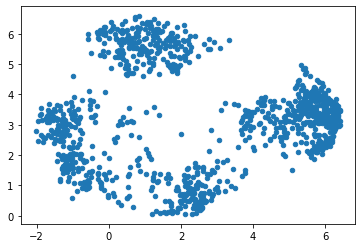

In [105]:
plt.scatter(ukb_red.umap_0, ukb_red.umap_1, s=20)

In [106]:
ukb_umap_red, reducer_red = compute_umap(ukb_red[4:], n_neighbors=15)

In [107]:
red_id = skdim.id.MOM().fit(ukb_red[4:], n_neighbors=500)
red_id.dimension_

4.75785213625597

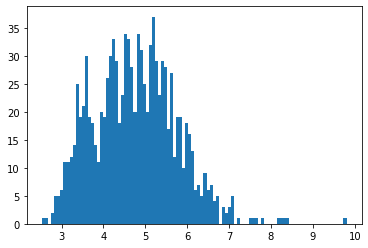

In [108]:
h = plt.hist(red_id.dimension_pw_, bins=100)

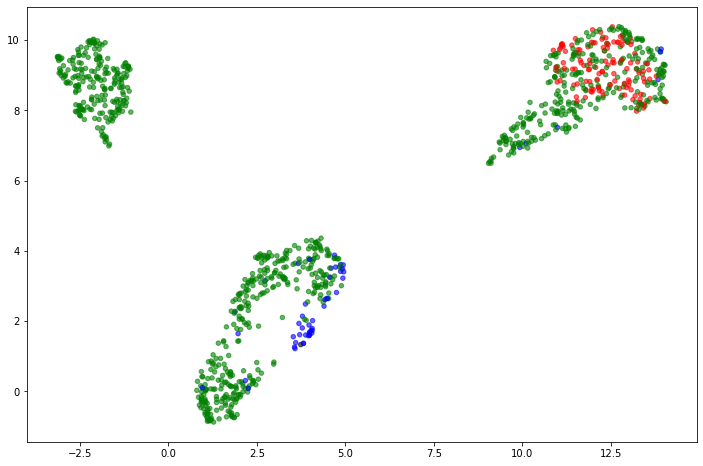

In [109]:
plt.figure(figsize=(12,8))
q_min = np.min(red_id.dimension_pw_)
q_05 = np.quantile(red_id.dimension_pw_, 0.05) 
q_95 = np.quantile(red_id.dimension_pw_, 0.95)
q_max = np.max(red_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, 3.5, q_95, q_max], ['red', 'green', 'blue'])
alpha = []
plt.scatter(ukb_umap_red[:,0], ukb_umap_red[:,1], s=20, c=red_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

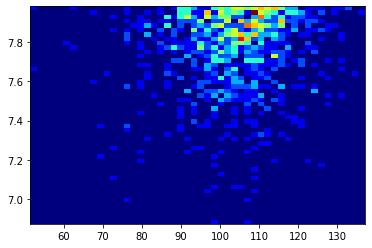

In [110]:
heatmap, xedges, yedges = np.histogram2d(ukb_red.distance, ukb_red.id, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [111]:
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1001428,7.944906,5.732121,2.168876,90.177824,13.958853,6.722831,2.681826,22.191032,-14.414640,6.782674,...,1.918153,-0.682570,-16.391940,22.873203,7.485595,9.147932,15.834381,-18.987041,1.544644,18.500130
sub-1002584,7.931327,4.781820,2.476209,87.116523,3.955615,-10.637339,-10.769439,23.307901,1.056509,17.353708,...,-8.042904,-3.884377,-16.391745,26.140324,22.623495,-9.563020,7.716669,-11.420115,-8.246140,-3.183921
sub-1006097,7.711633,-1.428429,1.797008,89.005220,-9.413847,11.568603,-11.930636,10.195893,1.765314,-13.150645,...,9.334038,-23.789180,-3.751849,12.157798,10.245606,11.783370,-1.914953,-8.530606,5.769588,-5.162775
sub-1007175,7.760070,-0.634674,1.792432,104.091510,0.935592,26.521011,26.941525,-33.340640,24.360199,-30.656700,...,3.268295,9.632117,6.543727,-1.203587,-9.322285,11.173265,-0.461867,-14.681664,-8.153533,2.494002
sub-1012329,7.809599,1.941222,0.247470,105.363021,-7.963512,-7.696100,-0.735596,-26.755700,27.630894,-16.703897,...,-11.145224,5.245847,9.175849,15.949187,4.508336,8.536000,-1.908457,-21.543129,-6.978517,-13.282549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6006597,7.619635,0.487379,5.089593,99.496190,21.622849,-3.470414,-14.737084,-0.757807,2.629371,-7.930192,...,9.488499,1.517024,-3.279241,11.746065,-4.296653,-16.131123,11.686851,32.012535,-5.735688,26.793440
sub-6012830,7.698987,1.238704,1.280015,113.167449,-1.793868,2.161973,17.070328,-29.560947,16.839611,-16.472170,...,-2.269993,12.021235,0.915041,-2.923106,6.649467,-6.814797,-10.427542,-20.410946,2.673686,-1.004377
sub-6017717,7.906825,5.252934,3.298855,102.133237,14.403642,18.097060,10.274202,24.357128,4.414149,-6.431343,...,10.210171,3.936933,-10.687284,-5.383178,10.993071,0.832871,8.839955,-19.987530,0.302077,-16.902506


In [112]:
ukb_red2 = ukb_red[ukb_red.umap_0 > 6]
ukb_red2

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1042595,7.299930,6.263248,3.294827,99.858323,28.002136,14.700094,4.938283,27.282162,-11.051992,-3.443989,...,9.494812,7.251668,-0.295780,4.539484,7.414229,17.004840,4.917595,-22.198837,-6.963178,-8.433139
sub-1136748,7.519326,6.009291,3.391378,95.539406,9.269849,-3.859058,-9.155723,19.328129,6.727714,10.951795,...,-22.802738,8.410542,-13.011965,12.984337,41.533108,-1.869982,27.354588,-11.138872,-0.360605,-13.720178
sub-1156367,7.932553,6.192217,2.429834,92.557685,25.350132,12.042912,3.395609,24.351290,-24.215199,-2.690408,...,-3.330891,10.383239,1.512330,33.997845,13.299048,11.065726,14.922224,-15.335876,6.033555,14.443308
sub-1303394,7.756785,6.349514,3.315476,98.306097,23.497168,6.235235,5.024312,19.869501,-4.731901,1.054961,...,-1.165027,10.864475,-3.149800,9.806861,11.055522,4.778244,11.388839,-18.570164,9.103302,-9.510122
sub-1447303,7.513161,6.021311,2.509069,110.213938,18.376860,2.577822,18.338839,11.796680,2.558118,5.133684,...,-20.400421,28.930070,-8.369178,18.140192,30.671892,-9.646120,23.979890,-14.834671,9.429197,-10.680899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-5641244,7.057168,6.259304,3.222323,98.019710,28.242365,15.014417,6.982579,20.417710,-11.114306,-4.315196,...,-0.104645,7.609922,1.479127,11.076726,11.891745,13.759373,15.696018,-19.014517,-6.035403,-6.565436
sub-5745220,7.824247,6.131897,3.217115,87.344817,12.748428,0.390126,7.921121,20.158916,-2.865369,3.487678,...,-11.868198,11.190681,-17.081347,5.292738,26.549892,1.082920,8.726729,-20.506530,4.234582,-8.845732
sub-5765282,7.766490,6.007633,3.565179,110.776798,22.852600,20.541393,-15.431994,33.380535,0.954901,-3.172832,...,12.096230,11.476433,-2.372441,6.333894,7.092736,5.787031,10.500921,-20.039324,-11.398337,-2.479877


In [113]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_emb)
explained_all = my_model.explained_variance_ratio_.cumsum()

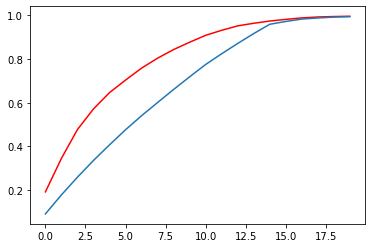

In [114]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_red2[4:])
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)

In [115]:
reduced_ukb_emb.shape

(21051, 20)

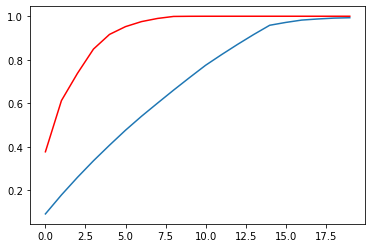

In [116]:
my_model = PCA(n_components=20)
on_axes = my_model.fit_transform(reduced_ukb_emb)
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)

In [117]:
explained

array([0.37727833, 0.61239123, 0.73760927, 0.84914637, 0.9164885 ,
       0.95232713, 0.9754165 , 0.9898732 , 0.99911135, 0.9998021 ,
       0.9999911 , 0.9999955 , 0.9999983 , 0.99999946, 0.9999999 ,
       0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 , 0.9999999 ],
      dtype=float32)

In [118]:
on_axes.shape

(21051, 20)

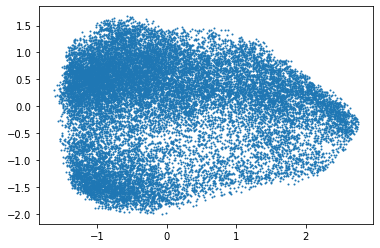

In [119]:
plt.scatter(on_axes[:,0], on_axes[:,1], s=1)

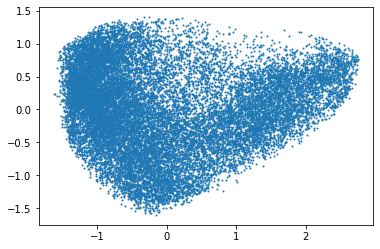

In [120]:
plt.scatter(on_axes[:,0], on_axes[:,2], s=1)

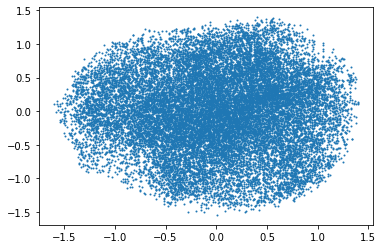

In [121]:
plt.scatter(on_axes[:,2], on_axes[:,3], s=1)

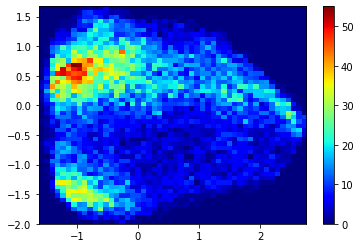

In [122]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

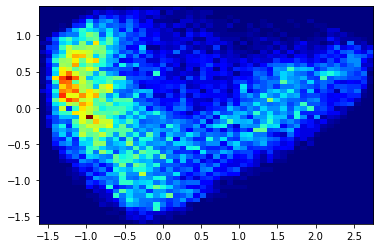

In [127]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,2], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [124]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

X = ukb_emb
umap_embedding = reduced_ukb_emb

#MNIST variation explained by UMAP1
UMAP_matrix = pd.DataFrame(umap_embedding)
pls = PLSRegression(n_components = 1)
pls.fit(UMAP_matrix, X)
y_pred = pls.predict(UMAP_matrix)
print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
#0.07335034485651613

#Here the same but more explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07335034485652026


#Here the same but explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07265918428991347

0.055236481794687375
dim1     -213.097447
dim2     -177.748437
dim3     -260.682225
dim4     -173.438352
dim5     -183.311699
             ...    
dim252   -273.969359
dim253   -361.789374
dim254   -192.846671
dim255   -311.426531
dim256   -218.932170
Length: 256, dtype: float64
dim1     -213.097447
dim2     -177.748437
dim3     -260.682225
dim4     -173.438352
dim5     -183.311699
             ...    
dim252   -273.969359
dim253   -361.789374
dim254   -192.846671
dim255   -311.426531
dim256   -218.932170
Length: 256, dtype: float64


In [125]:
X = reduced_ukb_emb

explainable = np.zeros((X.shape[1],1))
for i in range(X.shape[1]):
    umap_embedding = reduced_ukb_emb[:,i]

    #MNIST variation explained by UMAP1
    UMAP_matrix = pd.DataFrame(umap_embedding)
    pls = PLSRegression(n_components = 1)
    pls.fit(UMAP_matrix, X)
    y_pred = pls.predict(UMAP_matrix)
    print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
    #0.07335034485651613

    #Here the same but more explicitly via the R^2 equation above
    # print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    # np.mean(X, axis = 0))**2))
    #0.07335034485652026


    #Here the same but explicitly via the R^2 equation above
    explainable[i] = 1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    np.mean(X, axis = 0))**2)
    #0.07265918428991347

0.3740604120213074
0.2350026694313656
0.11787248884438169
0.15651214421703014
0.07804501141787426
0.05717031287893985
0.06854234484244828
0.02127322447220605
0.0669266721806314
0.049624494980811104
0.11467001658521009
0.051976802175747794
0.05823468346692222
0.07334416238924833
0.059839268405242424
0.21711662275322946
0.14097335190362348
0.06637727925000159
0.09822588686844502
0.20573971155275114


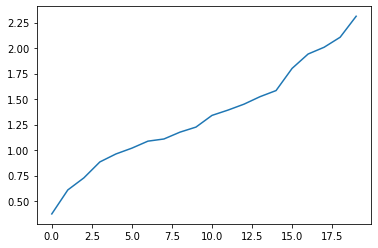

In [126]:
plt.plot(explainable.cumsum())